<a href="https://colab.research.google.com/github/ChaHyunJoon/ChaHyunJoon/blob/main/House_Price_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [523]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
  

In [524]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [525]:
path='/content/drive/MyDrive/ML Practices/data/house prices/'
train=pd.read_csv(path+'train.csv')
test=pd.read_csv(path+'test.csv')
submission=pd.read_csv(path+'sample_submission.csv')

In [526]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [527]:
train.drop(['Id'],axis =1,inplace=True)

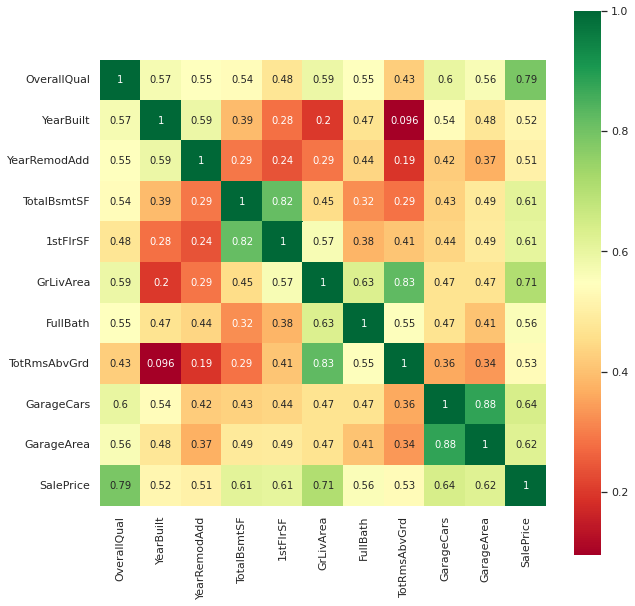

In [528]:
corr_mat=train.corr()
high_corr=corr_mat.index[abs(corr_mat['SalePrice'])>0.5]
plt.figure(figsize=(10, 10))
sns.heatmap(train[high_corr].corr(), annot=True, square=True, cmap='RdYlGn')

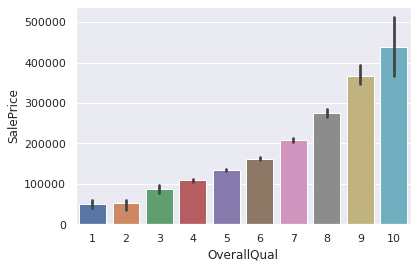

In [529]:
sns.barplot(train.OverallQual, train.SalePrice)

In [530]:
#sns.set()
#cols=['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
#sns.pairplot(train[cols], size=3)
#plt.show()


 mu = 180921.20 and sigma = 79415.29


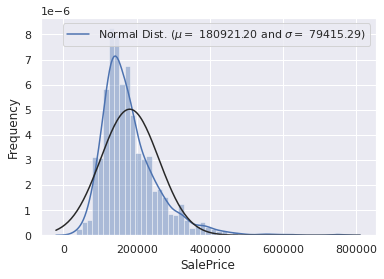

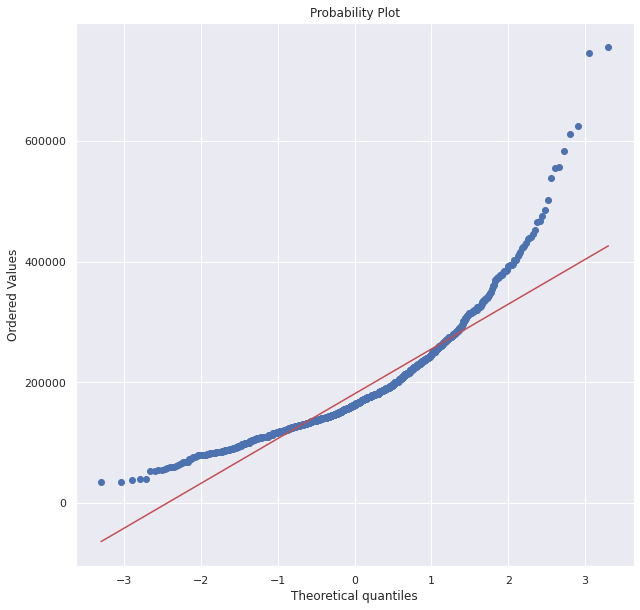

In [531]:
from scipy import stats
from scipy.stats import skew, norm

sns.distplot(train['SalePrice'], fit=norm)

(mu, sigma)=norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
plt.legend(['Normal Dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

fig=plt.figure(figsize=(10, 10))
res=stats.probplot(train.SalePrice, plot=plt)
plt.show()

mu=180921.20, sigma=79415.29


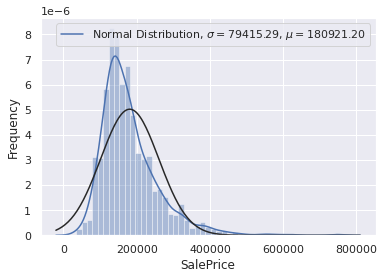

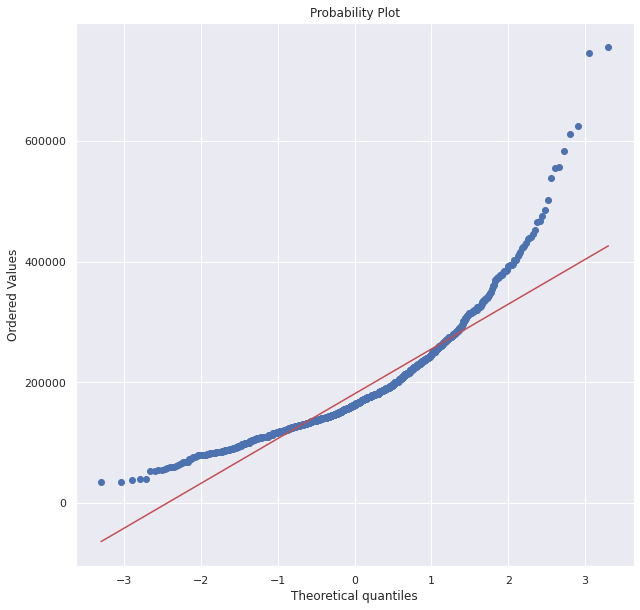

In [532]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(train.SalePrice, fit=norm)

(mu, sigma)=norm.fit(train['SalePrice'])
print("mu={:.2f}, sigma={:.2f}".format(mu, sigma))
plt.legend(["Normal Distribution, $\sigma=${:.2f}, $\mu=${:.2f}".format(sigma, mu)], loc='best')
plt.ylabel('Frequency')

fig=plt.figure(figsize=(10, 10))
res=stats.probplot(train.SalePrice, plot=plt)
plt.show()

In [533]:
train.SalePrice = np.log1p(train.SalePrice )
y = train.SalePrice

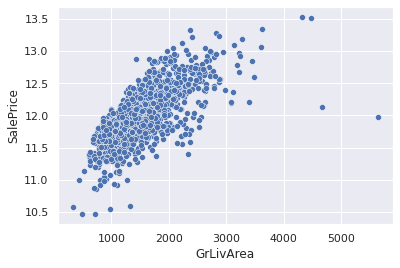

In [534]:
sns.scatterplot(y=train.SalePrice, x=train.GrLivArea)


 mu = 12.02 and sigma = 0.40


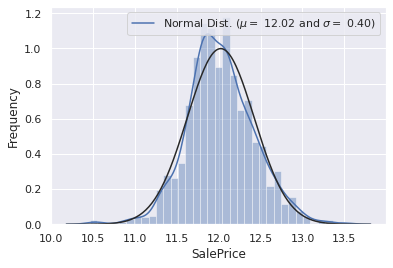

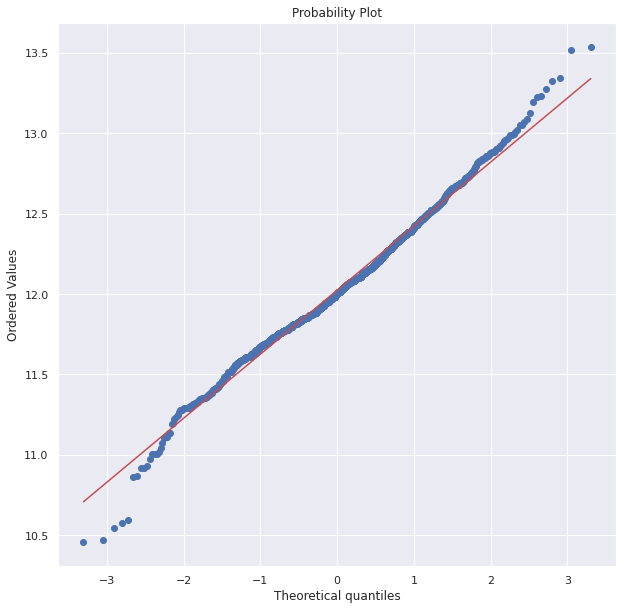

In [535]:
sns.distplot(train['SalePrice'], fit=norm)

(mu, sigma)=norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
plt.legend(['Normal Dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

fig=plt.figure(figsize=(10, 10))
res=stats.probplot(train.SalePrice, plot=plt)
plt.show()

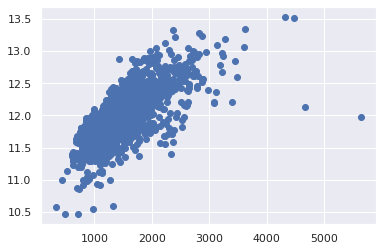

In [536]:
#Pre-Processing
plt.scatter(y=train['SalePrice'], x=train['GrLivArea'])
plt.show()
#there are some outliers

In [537]:
train_nas=train.isnull().sum()
train_nas=train_nas[train_nas>0]
train_nas.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [538]:
test_nas=test.isnull().sum()
test_nas=test_nas[test_nas>0]
test_nas.sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [539]:
print("Find most important features")
corr=train.corr()
corr.sort_values(["SalePrice"], ascending=False, inplace=True)
print(corr.SalePrice)

Find most important features
SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: Sal

In [540]:
categorical_features=train.select_dtypes(include=['object']).columns
numerical_features=train.select_dtypes(exclude=['object']).columns
numerical_features.value_counts().sum()

37

In [541]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 36
Categorical features : 43


In [542]:
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num=train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 348
Remaining NAs for numerical features in train : 0


In [543]:
from scipy.stats import skew
skewness=train_num.apply(lambda x : skew(x))
skewness.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.677636
dtype: float64

In [544]:
skewness=skewness[abs(skewness)>0.5]
skewness.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [545]:
skew_feature=train[skewness.index]
skew_feature.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [546]:
skew_feature=np.log1p(skew_feature)

In [547]:
train_cat.shape

(1460, 43)

In [548]:
train_num.shape

(1460, 36)

In [549]:
train_cat=pd.get_dummies(train_cat)

In [550]:
train_cat.shape

(1460, 252)

In [551]:
train_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [552]:
#Modeling
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [553]:
train=pd.concat([train_num, train_cat], axis=1)

In [554]:
train.shape

(1460, 288)

In [555]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=0)

In [556]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 288), (438, 288), (1022,), (438,))

In [557]:
X_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
64,60,69.0,9375,7,5,1997,1998,573.0,739,0,...,0,0,0,1,0,0,0,0,1,0
682,120,69.0,2887,6,5,1996,1997,0.0,1003,0,...,0,0,0,1,0,0,0,0,1,0
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,0,0,1,0,0,0,0,1,0


In [558]:
#Defining cross_val_score function for both train&test
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [559]:
train.values

array([[6.000e+01, 6.500e+01, 8.450e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 8.000e+01, 9.600e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.000e+01, 6.800e+01, 1.125e+04, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [7.000e+01, 6.600e+01, 9.042e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 6.800e+01, 9.717e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 7.500e+01, 9.937e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [561]:
#Linear model without Regularization
lr=LinearRegression()
lr.fit(X_train, y_train)
test_pred=lr.predict(X_test)
train_pred=lr.predict(X_train)
print('rmse on train', rmse_CV_train(lr).mean())
print('rmse on test', rmse_CV_test(lr).mean())

rmse on train 0.14107451875492386
rmse on test 0.252113288207692


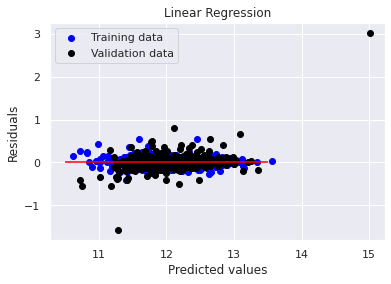

In [567]:
plt.scatter(train_pred, train_pred-y_train, c='blue', label='Training data')
plt.scatter(test_pred, test_pred-y_test, c='black', label='Validation data')
plt.title('Linear Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, color='red', xmin=10.5, xmax=13.5)
plt.show()

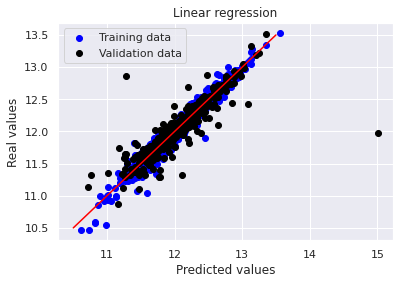

In [569]:
plt.scatter(train_pred, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [572]:
ridge=RidgeCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha=ridge.alpha_
print('best alpha', alpha)

print('Try again for more precision with alphas centered around'+str(alpha))
ridge=RidgeCV(alphas=[alpha*0.6, alpha*0.65, alpha*0.7, alpha*0.75, alpha*0.8, alpha*0.85, alpha*0.9, alpha*0.95, alpha, alpha*1.05, alpha*1.1, alpha*1.15, alpha*1.2, alpha*1.25, alpha*1.3, alpha*1.35, alpha*1.4], cv=5)
ridge.fit(X_train, y_train)
alpha=ridge.alpha_
print('Best alpha', alpha)
print('Ridge rmse on Training set : ',rmse_CV_train(ridge).mean())
print('Ridge rmse on Test set : ',rmse_CV_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

best alpha 10.0
Try again for more precision with alphas centered around10.0
Best alpha 6.0
Ridge rmse on Training set :  0.1332808101440932
Ridge rmse on Test set :  0.17950045447567076


In [573]:
X_train.shape

(1022, 288)

In [576]:
coef = pd.Series(ridge.coef_, index=X_train.columns)

print("Ridge picked " + str(sum(coef!=0))+" variables and eliminated the other " + str(sum(coef==0)) + ' variables')

Ridge picked 280 variables and eliminated the other 8 variables


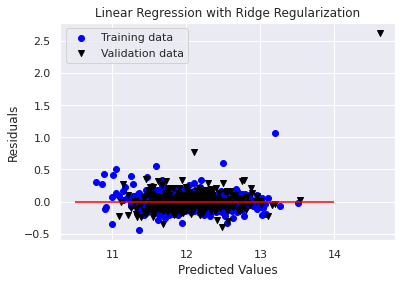

In [578]:
plt.scatter(y_train_rdg, y_train_rdg-y_train, c='blue', label="Training data")
plt.scatter(y_test_rdg, y_test_rdg-y_test, c='black', marker='v', label='Validation data')
plt.title('Linear Regression with Ridge Regularization')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(xmin=10.5, xmax=14, color='red', y=0)
plt.show()

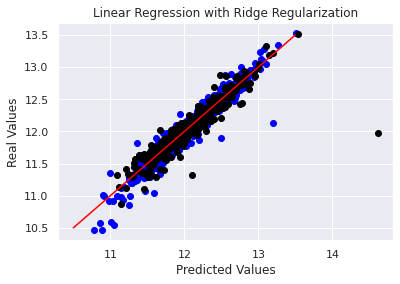

In [581]:
plt.scatter(y_train_rdg, y_train, c='blue', label='Training data')
plt.scatter(y_test_rdg, y_test, c='black', label='Validation data')
plt.title('Linear Regression with Ridge Regularization')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.plot([10.5, 13.5], [10.5, 13.5], color='red')
plt.show()